In [5]:
import numpy as np
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
file = '../data/hetdex_sc1_detinfo_v3.2.fits'
hdul = fits.open(file) #open fits file
hdul.info()
# Step 4: Access the BinTableHDU (in this case, it's the second HDU with index 1)
bintable_hdu = hdul[1]

# Step 5: Extract data from the BinTableHDU and save it to a data variable
data = bintable_hdu.data

# Step 6: Close the FITS file when you are done with it
hdul.close()

Filename: ../data/hetdex_sc1_detinfo_v3.2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    393   297261R x 86C   [K, 26A, E, E, E, 8A, E, 4A, K, L, 4A, 4A, E, E, E, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 16A, 5A, E, E, E, E, 7A, 1A, E, K, E, E, E, E, E, E, E, E, K, 12A, J, J, 20A, 38A, E, J, J, E, E, E, E, 16A, 5A, E, E, E, E, E, E]   


In [12]:
columns_to_extract = ['source_type', 'source_name', 'RA', 'DEC', 'z_hetdex', 'z_hetdex_conf']

In [13]:
raw_data = {col: data[col] for col in columns_to_extract}
df_raw = pd.DataFrame(raw_data)

In [14]:
data = data[data['source_type'] != 'star']
data = data[data['z_hetdex'] >=1.9]
data = data[data['z_hetdex_conf'] >= 0.1]
sorted_indices = np.argsort(data['DEC'])
data = data[sorted_indices]
data_extracted = {col: data[col] for col in columns_to_extract}

In [15]:
# Convert the data_extracted dictionary to a Pandas DataFrame
df = pd.DataFrame(data_extracted)

df['Zsin(RA)'] = np.sin(np.radians(df['RA']))*df['z_hetdex']
df['Zcos(RA)'] = np.cos(np.radians(df['RA']))*df['z_hetdex']
df['Zsin(DEC)'] = np.sin(np.radians(df['DEC']))*df['z_hetdex']  
df['Zcos(DEC)'] = np.cos(np.radians(df['DEC']))*df['z_hetdex']

# Write the DataFrame to a CSV file with headers
df.to_csv('output_data.csv', index=False)

lae    50294
agn     5526
oii      287
Name: count, dtype: int64


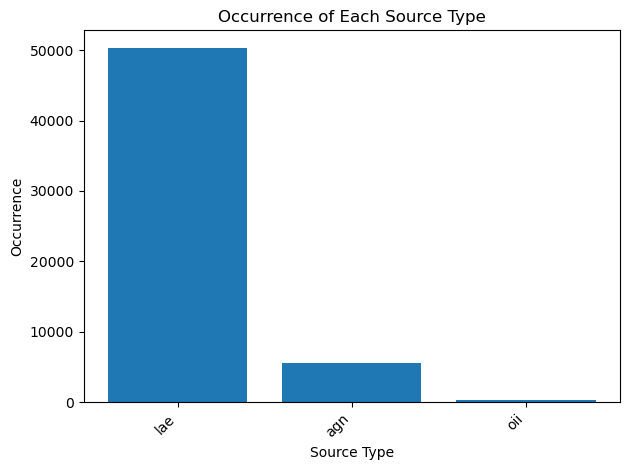

In [8]:
SOURCE_TYPE =  df['source_type'].to_numpy()
# Count occurrences of each source type
source_type_counts = pd.Series(SOURCE_TYPE).value_counts()
print(source_type_counts)
# Create a bar graph
plt.bar(source_type_counts.index, source_type_counts.values)
plt.xlabel('Source Type')
plt.ylabel('Occurrence')
plt.title('Occurrence of Each Source Type')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()